# CHESS

In [2]:
import chess

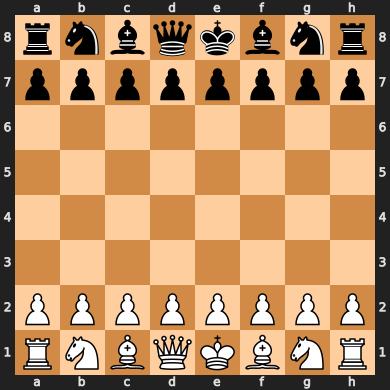

In [3]:
board=chess.Board()
board

In [4]:
board.legal_moves

<LegalMoveGenerator at 0x1bf75e09ed0 (Nh3, Nf3, Nc3, Na3, h3, g3, f3, e3, d3, c3, b3, a3, h4, g4, f4, e4, d4, c4, b4, a4)>

In [5]:
board.is_checkmate()

False

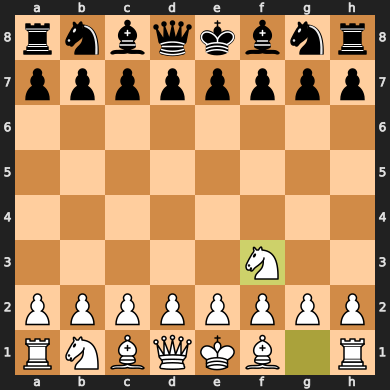

In [6]:
board.push_san('Nf3')
board

In [7]:
board.fen()

'rnbqkbnr/pppppppp/8/8/8/5N2/PPPPPPPP/RNBQKB1R b KQkq - 1 1'

# STOCKFISH

In [8]:
from stockfish import Stockfish

# Initialize Stockfish with the provided path to the executable
stockfish = Stockfish("D:/Misc/stockfish-windows-x86-64-avx2/stockfish/stockfish-windows-x86-64-avx2.exe")
stockfish.set_depth(2)
stockfish.set_skill_level(8)
stockfish.get_parameters()

{'Debug Log File': '',
 'Contempt': 0,
 'Min Split Depth': 0,
 'Ponder': 'false',
 'MultiPV': 1,
 'Skill Level': 8,
 'Move Overhead': 10,
 'Minimum Thinking Time': 20,
 'Slow Mover': 100,
 'UCI_Chess960': 'false',
 'UCI_LimitStrength': 'false',
 'UCI_Elo': 1350,
 'Threads': 1,
 'Hash': 16}

In [9]:
stockfish.get_best_move()

'd2d4'

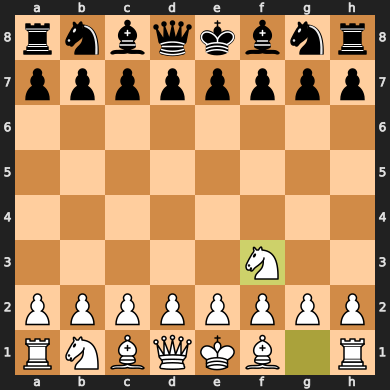

In [10]:
display(board)

In [11]:
stockfish.set_fen_position(board.fen())
stockfish.get_evaluation()

{'type': 'cp', 'value': 11}

In [12]:
stockfish.get_top_moves()

[{'Move': 'd7d5', 'Centipawn': 0, 'Mate': None},
 {'Move': 'c7c5', 'Centipawn': 9, 'Mate': None},
 {'Move': 'c7c6', 'Centipawn': 9, 'Mate': None},
 {'Move': 'g8f6', 'Centipawn': 9, 'Mate': None},
 {'Move': 'e7e6', 'Centipawn': 11, 'Mate': None}]

# CHESS>COM

In [13]:
import requests

username = 'mike991339'
email = 'hc991339@gmail.com'
url = f"https://api.chess.com/pub/player/{username}/games/archives"

headers = {
    'User-Agent': f'Chess.py (Python 3.7) (username: {username}; contact: {email})'
}
# Fetch the archives URLs
response = requests.get(url,headers=headers)
archives = response.json()['archives']

# Fetch games from the most recent archive
recent_archive_url = archives[-1]
response = requests.get(recent_archive_url, headers=headers)
games = response.json()['games']

# Print details of each game
for game in games:
    print(f"Game URL: {game['url']}")
    print(f"White: {game['white']['username']} vs Black: {game['black']['username']}")
    print(f"Result: {game['white']['result']} - {game['black']['result']}")
    print("-----")


Game URL: https://www.chess.com/game/live/121203352284
White: Mike991339 vs Black: Sen_God
Result: checkmated - win
-----
Game URL: https://www.chess.com/game/live/121203363410
White: LOUAI_04_MATTHEW vs Black: Mike991339
Result: timeout - win
-----
Game URL: https://www.chess.com/game/live/121203643632
White: joban_x62 vs Black: Mike991339
Result: win - timeout
-----
Game URL: https://www.chess.com/game/live/121206570264
White: Mike991339 vs Black: NBERTALAN
Result: timeout - win
-----
Game URL: https://www.chess.com/game/live/121206918400
White: aliszs vs Black: Mike991339
Result: win - timeout
-----
Game URL: https://www.chess.com/game/live/121207455242
White: Mike991339 vs Black: SuperMezG
Result: win - timeout
-----
Game URL: https://www.chess.com/game/live/121207486302
White: Mike991339 vs Black: ask122
Result: timeout - win
-----
Game URL: https://www.chess.com/game/live/121209661138
White: AKO_TO vs Black: Mike991339
Result: win - timeout
-----
Game URL: https://www.chess.com/g

In [14]:
pgn = games[-1]['pgn']

# Print the PGN of the game
print(pgn)

[Event "Live Chess"]
[Site "Chess.com"]
[Date "2024.12.26"]
[Round "-"]
[White "Pingnin1"]
[Black "Mike991339"]
[Result "0-1"]
[CurrentPosition "6k1/pp3p1p/2r1p1pP/r3n3/1b6/1P6/KP6/8 w - -"]
[Timezone "UTC"]
[ECO "D06"]
[ECOUrl "https://www.chess.com/openings/Queens-Gambit-Declined-Austrian-Variation-3.cxd5-Qxd5"]
[UTCDate "2024.12.26"]
[UTCTime "05:21:25"]
[WhiteElo "210"]
[BlackElo "211"]
[TimeControl "60"]
[Termination "Mike991339 won on time"]
[StartTime "05:21:25"]
[EndDate "2024.12.26"]
[EndTime "05:23:36"]
[Link "https://www.chess.com/game/live/121711532772"]

1. d4 {[%clk 0:00:59.8]} 1... d5 {[%clk 0:00:58.8]} 2. c4 {[%clk 0:00:58.7]} 2... c5 {[%clk 0:00:57.5]} 3. cxd5 {[%clk 0:00:57]} 3... Qxd5 {[%clk 0:00:55.8]} 4. e4 {[%clk 0:00:55.3]} 4... Qxe4+ {[%clk 0:00:53.1]} 5. Be3 {[%clk 0:00:51.5]} 5... cxd4 {[%clk 0:00:50.9]} 6. f3 {[%clk 0:00:46.1]} 6... Qxe3+ {[%clk 0:00:47.4]} 7. Ne2 {[%clk 0:00:43]} 7... d3 {[%clk 0:00:45.8]} 8. Nd2 {[%clk 0:00:36.7]} 8... dxe2 {[%clk 0:00:43.3

In [15]:
import chess.pgn
import io

# Sample PGN string from the last game
pgn = games[-1]['pgn']

# Parse the PGN string
pgn_io = io.StringIO(pgn)
game = chess.pgn.read_game(pgn_io)

# Initialize an empty list to store the moves
moves_list = []

# Traverse the game and collect the moves
node = game
while node.variations:
    next_node = node.variation(0)
    move = node.board().san(next_node.move)
    moves_list.append(move)
    node = next_node

# Print the list of moves
print(moves_list)

# Function to get evaluation after each move
def evaluate_moves(moves):
    stockfish.set_position(moves)
    evaluation = stockfish.get_evaluation()
    best_move = stockfish.get_best_move()
    print(f"Position: {' '.join(moves)}")
    print(f"Evaluation: {evaluation}")
    print(f"Best Move: {best_move}")
    print("-----")

# Enter each move into Stockfish one by one and get evaluations
current_moves = []
for move in moves_list:
    current_moves.append(move)
    evaluate_moves(current_moves)

['d4', 'd5', 'c4', 'c5', 'cxd5', 'Qxd5', 'e4', 'Qxe4+', 'Be3', 'cxd4', 'f3', 'Qxe3+', 'Ne2', 'd3', 'Nd2', 'dxe2', 'Bxe2', 'e6', 'Qa4+', 'Bd7', 'Qb3', 'Qxb3', 'axb3', 'Bb4', 'O-O-O', 'Nf6', 'Ne4', 'Nxe4', 'fxe4', 'O-O', 'Rhg1', 'Bb5', 'g4', 'Bxe2', 'Rdf1', 'Bxf1', 'Rxf1', 'Nc6', 'g5', 'Nd4', 'Rd1', 'Nf3', 'e5', 'Nxg5', 'h4', 'Nf3', 'h5', 'Nxe5', 'h6', 'g6', 'Rd7', 'Rfd8', 'Kb1', 'Rxd7', 'Ka1', 'Rc8', 'Ka2', 'Rc6', 'Kb1', 'Rd5', 'Ka2', 'Ra5+']
Position: d4
Evaluation: {'type': 'cp', 'value': 29}
Best Move: d2d4
-----
Position: d4 d5
Evaluation: {'type': 'cp', 'value': 29}
Best Move: d2d4
-----
Position: d4 d5 c4
Evaluation: {'type': 'cp', 'value': 29}
Best Move: c2c4
-----
Position: d4 d5 c4 c5
Evaluation: {'type': 'cp', 'value': 29}
Best Move: e2e3
-----
Position: d4 d5 c4 c5 cxd5
Evaluation: {'type': 'cp', 'value': 29}
Best Move: e2e4
-----
Position: d4 d5 c4 c5 cxd5 Qxd5
Evaluation: {'type': 'cp', 'value': 29}
Best Move: e2e4
-----
Position: d4 d5 c4 c5 cxd5 Qxd5 e4
Evaluation: {'type

In [16]:
fen = games[-1]['fen'] if 'fen' in games[0] else 'FEN not available'
fen

'6k1/pp3p1p/2r1p1pP/r3n3/1b6/1P6/KP6/8 w - -'

In [17]:
stockfish.set_fen_position(fen)

In [18]:
stockfish.get_evaluation()

{'type': 'cp', 'value': -915}

# tkinter


In [19]:
import tkinter as tk

In [20]:
app=tk.Tk()
app.title='title'

entry=tk.Entry(app,width=1000)
entry.pack()

button = tk.Button(app,text='okk')
button.pack()

app.mainloop()

In [21]:
import chess
import chess.svg

board = chess.Board()
print(chess.svg.board(board=board))


<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" viewBox="0 0 390 390"><desc><pre>r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R</pre></desc><defs><g id="white-pawn" class="white pawn"><path d="M22.5 9c-2.21 0-4 1.79-4 4 0 .89.29 1.71.78 2.38C17.33 16.5 16 18.59 16 21c0 2.03.94 3.84 2.41 5.03-3 1.06-7.41 5.55-7.41 13.47h23c0-7.92-4.41-12.41-7.41-13.47 1.47-1.19 2.41-3 2.41-5.03 0-2.41-1.33-4.5-3.28-5.62.49-.67.78-1.49.78-2.38 0-2.21-1.79-4-4-4z" fill="#fff" stroke="#000" stroke-width="1.5" stroke-linecap="round" /></g><g id="white-knight" class="white knight" fill="none" fill-rule="evenodd" stroke="#000" stroke-width="1.5" stroke-linecap="round" stroke-linejoin="round"><path d="M 22,10 C 32.5,11 38.5,18 38,39 L 15,39 C 15,30 25,32.5 23,18" style="fill:#ffffff; stroke:#000000;" /><path d="M 24,18 C 24.38,20.91 18.45,25.37 16,27 C 13,29 13.18,31.34 11,31 C 9.958,30.06 12.41,